In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

### Read un-normalized input matrices

In [2]:
from vpolo.alevin import parser #pip install vpolo

# has 769 rows
matrix_1 = parser.read_quants_bin("../norm_1_plot/E18_20160930_Neurons_Sample_59_quants_mat/")

# has 12080 rows
matrix_2 = parser.read_quants_bin("../norm_1_plot/E18_20160930_Neurons_Sample_20_quants_mat")

../norm_1_plot/E18_20160930_Neurons_Sample_59_quants_mat/alevin
 Done reading 700 cells
Read total 769 cells
Found total 9383838.999995388 reads
../norm_1_plot/E18_20160930_Neurons_Sample_20_quants_mat/alevin
 Done reading 12000 cells
Read total 12080 cells
Found total 63607455.99992195 reads


In [3]:
matrix_1.shape, matrix_2.shape

((769, 52325), (12080, 52325))

In [4]:
# matrix_1_769 = matrix_1[:769]
# matrix_2_769 = matrix_2[:769]

# use .sample
matrix_1_769 = matrix_1.sample(769)
matrix_2_769 = matrix_2.sample(769)

CPU times: user 2min 4s, sys: 48.3 s, total: 2min 52s
Wall time: 30.6 s


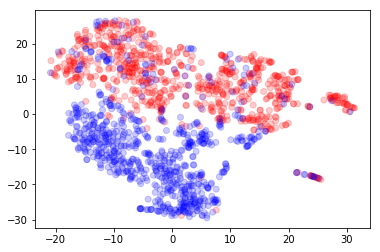

In [5]:
# Awesome library for super fast tSNE projection
from MulticoreTSNE import MulticoreTSNE as TSNE

ct = np.concatenate([matrix_1_769.values, matrix_2_769.values], axis=0)
tsne = TSNE(n_jobs=8)
%time Y = tsne.fit_transform(ct)

plt.scatter(Y[:,0], Y[:,1], c = ['r'] * matrix_1_769.shape[0] + ['b'] * matrix_2_769.shape[0], alpha=0.2)

### Calculate reads per cell

In [6]:
# There seems to be bias on the lower right end of the tSNE plot
# The algorithm for Depth normalization is inspired from here
# https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/using/aggregate#depth_normalization

# Calculate the reads per cell ration across the sample
rpc_1 = matrix_1.sum().sum() / len(matrix_1.index)
rpc_2 = matrix_2.sum().sum() / len(matrix_2.index)

In [7]:
rpc_1, rpc_2

(12202.651495442627, 5265.517880788032)

In [8]:
# Calculating the fractions of reads to keep
frac_kept_reads = min(rpc_1, rpc_2) / max(rpc_1, rpc_2)
frac_kept_reads

0.43150604462928127

### Divide cell values of matrix with greater rpc by fraction

In [9]:
matrix_2_norm = matrix_2 / frac_kept_reads

In [10]:
# matrix_2_norm_769 = matrix_2_norm[:769]
matrix_2_norm_769 = matrix_2_norm.sample(769)

CPU times: user 2min 16s, sys: 45.2 s, total: 3min 1s
Wall time: 29.9 s


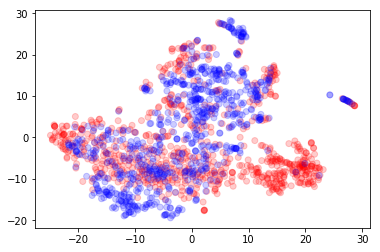

In [11]:
# Awesome library for super fast tSNE projection
from MulticoreTSNE import MulticoreTSNE as TSNE

ct = np.concatenate([matrix_2_norm_769.values, matrix_1_769.values], axis=0)
tsne = TSNE(n_jobs=8)
%time Y = tsne.fit_transform(ct)

plt.scatter(Y[:,0], Y[:,1], c = ['r'] * matrix_2_norm_769.shape[0] + ['b'] * matrix_1_769.shape[0], alpha=0.2)

### Plot matrices normalized from C++ code

In [12]:
from vpolo.alevin import parser #pip install vpolo

# has 12080 rows
matrix_3 = parser.read_quants_bin("../norm_op_2_plot/E18_20160930_Neurons_Sample_20_quants_mat/")

# has 769 rows
matrix_4 = parser.read_quants_bin("../norm_op_2_plot/E18_20160930_Neurons_Sample_59_quants_mat")

../norm_op_2_plot/E18_20160930_Neurons_Sample_20_quants_mat/alevin
 Done reading 12000 cells
Read total 12080 cells
Found total 147414658.71054307 reads
../norm_op_2_plot/E18_20160930_Neurons_Sample_59_quants_mat/alevin
 Done reading 700 cells
Read total 769 cells
Found total 9383838.999995388 reads


In [13]:
matrix_3.shape, matrix_4.shape

((12080, 52325), (769, 52325))

In [14]:
# matrix_3_769 = matrix_3[:769]
# matrix_4_769 = matrix_4[:769]

matrix_3_769 = matrix_3.sample(769)
matrix_4_769 = matrix_4.sample(769)

CPU times: user 2min 19s, sys: 44.4 s, total: 3min 3s
Wall time: 30.5 s


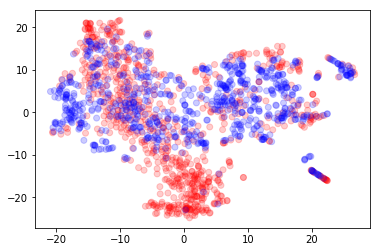

In [15]:
# Awesome library for super fast tSNE projection
from MulticoreTSNE import MulticoreTSNE as TSNE

ct = np.concatenate([matrix_3_769.values, matrix_4_769.values], axis=0)
tsne = TSNE(n_jobs=8)
%time Y = tsne.fit_transform(ct)

plt.scatter(Y[:,0], Y[:,1], c = ['r'] * matrix_3_769.shape[0] + ['b'] * matrix_4_769.shape[0], alpha=0.2)

### Use method from https://gist.github.com/k3yavi/55be0c0c660f1c0034f2d11df31bec00 to normalize

In [16]:
matrix_norm = []
for row in matrix_1.values:
    new_row = np.random.binomial(list(map(int, np.around(row))), frac_kept_reads)
    matrix_norm.append(new_row)

print(len(matrix_norm), len(matrix_norm[0]))

769 52325


CPU times: user 2min 16s, sys: 43.4 s, total: 2min 59s
Wall time: 29.5 s


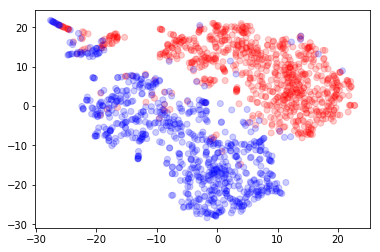

In [17]:
# plotting again the subsampled full data and the original half data
ct1 = np.concatenate([matrix_norm, matrix_1.values], axis=0)
tsne1 = TSNE(n_jobs=8)
%time Y = tsne1.fit_transform(ct1)

plt.scatter(Y[:,0], Y[:,1], c = ['r'] * len(matrix_norm) + ['b'] * matrix_1.shape[0], alpha=0.2)